# 1. Authenticate to Twitter

In [1]:
# Import tweepy to work with the twitter API
import tweepy as tw

# Import numpy and pandas to work with dataframes
import numpy as np
import pandas as pd

# Import seaborn and matplotlib for viz
from matplotlib import pyplot as plt

In [2]:
consumer_key = 'your_consumer_key'
consumer_secret = 'your_consumer_secret'
access_token = 'your_access_token'
access_token_secret = 'your_access_token_secret'

In [3]:
# Authenticate
auth = tw.OAuthHandler(consumer_key, consumer_secret)
# Set Tokens
auth.set_access_token(access_token, access_token_secret)
# Instantiate API
api = tw.API(auth, wait_on_rate_limit=True)

# 2. Get Tweets

In [17]:
#Set yout keyword
hashtag = "#RussianGP"
#Return 500 tweets
query = tw.Cursor(api.search, q=hashtag).items(800)
#Loop for each tweet and extract its text and created date
tweets = [{'Tweet':tweet.text, 'Timestamp':tweet.created_at} for tweet in query]
print(tweets)

[{'Tweet': 'RT @wtf1official: What a race! Hamilton takes win 100 but heartbreak for Lando 💔 So, so close to his first win #RussianGP #WTF1', 'Timestamp': datetime.datetime(2021, 9, 26, 19, 45, 22)}, {'Tweet': "RT @HondaRacingF1: Final charge 👊 See you Sochi, it's been a rollercoaster. 🎢 #RussianGP #PoweredByHonda https://t.co/WjGIsM476P", 'Timestamp': datetime.datetime(2021, 9, 26, 19, 45, 22)}, {'Tweet': "RT @F1: It's the difficult days that make you stronger, @LandoNorris 👊\n\n#RussianGP #F1 https://t.co/dCWKro7IqG", 'Timestamp': datetime.datetime(2021, 9, 26, 19, 45, 21)}, {'Tweet': 'RT @Adel__F1: رقم تاريخي جديد في الفورمولا 1 سوف يسجل لفترات طويلة وقابل لزيادة .. 100 فوز للويس هاملتون في تاريخ الفورمولا 1 💯 \n#RussianGP…', 'Timestamp': datetime.datetime(2021, 9, 26, 19, 45, 20)}, {'Tweet': "RT @autosport: Hamilton makes history with win number 💯 🏆\n\nHere's how his victory tally compares to the greatest #F1 drivers of all time 👏…", 'Timestamp': datetime.datetime(2021, 9, 26, 19, 

In [27]:
# Create a data frame
df = pd.DataFrame.from_dict(tweets)
df.head()

,Tweet,Timestamp
0,RT @wtf1official: What a race! Hamilton takes ...,2021-09-26 19:45:22
1,RT @HondaRacingF1: Final charge 👊 See you Soch...,2021-09-26 19:45:22
2,RT @F1: It's the difficult days that make you ...,2021-09-26 19:45:21
3,RT @Adel__F1: رقم تاريخي جديد في الفورمولا 1 س...,2021-09-26 19:45:20
4,RT @autosport: Hamilton makes history with win...,2021-09-26 19:45:18


In [28]:
Hamilton_refs = ['Lewis','Hamilton']
Max_refs = ['Max', 'Verstappen']
Bottas_refs = ['Bottas']
Norris_refs = ['Lando', 'Norris']
Checo_refs = ['Checo', 'Perez', 'Pérez']

In [29]:
def identify_subject(tweet, refs):
    flag = 0 
    for ref in refs:
        if tweet.find(ref) != -1:
            flag = 1
    return flag

df['Hamilton'] = df['Tweet'].apply(lambda x: identify_subject(x, Hamilton_refs)) 
df['Verstappen'] = df['Tweet'].apply(lambda x: identify_subject(x, Max_refs))
df['Bottas'] = df['Tweet'].apply(lambda x: identify_subject(x, Bottas_refs))
df['Norris'] = df['Tweet'].apply(lambda x: identify_subject(x, Norris_refs))
df['Pérez'] = df['Tweet'].apply(lambda x: identify_subject(x, Checo_refs))
df.head(10)

,Tweet,Timestamp,Hamilton,Verstappen,Bottas,Norris,Pérez
0,RT @wtf1official: What a race! Hamilton takes ...,2021-09-26 19:45:22,1,0,0,1,0
1,RT @HondaRacingF1: Final charge 👊 See you Soch...,2021-09-26 19:45:22,0,0,0,0,0
2,RT @F1: It's the difficult days that make you ...,2021-09-26 19:45:21,0,0,0,1,0
3,RT @Adel__F1: رقم تاريخي جديد في الفورمولا 1 س...,2021-09-26 19:45:20,0,0,0,0,0
4,RT @autosport: Hamilton makes history with win...,2021-09-26 19:45:18,1,0,0,0,0
5,"RT @F1: ""All in all to come away with second h...",2021-09-26 19:45:18,0,1,0,0,0
6,É o Acontecimento No #RussianGP Se Repete No F...,2021-09-26 19:45:17,0,0,0,0,0
7,Looking to see what happened to Latifi in the ...,2021-09-26 19:45:16,0,0,0,0,0
8,RT @F1: It's the difficult days that make you ...,2021-09-26 19:45:15,0,0,0,1,0
9,RT @F1: Mercedes extend their lead at the top\...,2021-09-26 19:45:13,0,0,0,0,0


# 3. Preprocess

In [30]:
# Import stopwords
import nltk
from nltk.corpus import stopwords

# Import textblob
from textblob import Word, TextBlob

In [31]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
custom_stopwords = ['RT', '#RussianGP']

[nltk_data] Downloading package stopwords to /Users/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [32]:
# Create a function that cleans your tweets
def preprocess_tweets(tweet, custom_stopwords):
    processed_tweet = tweet
    processed_tweet.replace('[^\a\the\now\to]', '')
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in stop_words)
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in custom_stopwords)
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split())
    return(processed_tweet)

df['Processed Tweet'] = df['Tweet'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
df.head()

,Tweet,Timestamp,Hamilton,Verstappen,Bottas,Norris,Pérez,Processed Tweet
0,RT @wtf1official: What a race! Hamilton takes ...,2021-09-26 19:45:22,1,0,0,1,0,@wtf1official: What race! Hamilton take win 10...
1,RT @HondaRacingF1: Final charge 👊 See you Soch...,2021-09-26 19:45:22,0,0,0,0,0,"@HondaRacingF1: Final charge 👊 See Sochi, roll..."
2,RT @F1: It's the difficult days that make you ...,2021-09-26 19:45:21,0,0,0,1,0,"@F1: It's difficult day make stronger, @LandoN..."
3,RT @Adel__F1: رقم تاريخي جديد في الفورمولا 1 س...,2021-09-26 19:45:20,0,0,0,0,0,@Adel__F1: رقم تاريخي جديد في الفورمولا 1 سوف ...
4,RT @autosport: Hamilton makes history with win...,2021-09-26 19:45:18,1,0,0,0,0,@autosport: Hamilton make history win number 💯...


In [23]:
print('Base review\n', df['Tweet'][0])
print('\n------------------------------------\n')
print('Cleaned and lemmatized review\n', df['Processed Tweet'][0])

Base review
 RT @wtf1official: What a race! Hamilton takes win 100 but heartbreak for Lando 💔 So, so close to his first win #RussianGP #WTF1

------------------------------------

Cleaned and lemmatized review
 @wtf1official: What race! Hamilton take win 100 heartbreak Lando 💔 So, close first win #WTF1


# 4. Calculate Sentiment

In [34]:
# Calculate polarity: how positive of negative something is
df['polarity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
# Calculate polarity: how much that particular piece of text is base on emotion
df['subjectivity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[1])
df[['Processed Tweet', 'Hamilton', 'Verstappen', 'Bottas', 'Norris','Pérez', 'polarity', 'subjectivity']].head(20)

,Processed Tweet,Hamilton,Verstappen,Bottas,Norris,Pérez,polarity,subjectivity
0,@wtf1official: What race! Hamilton take win 10...,1,0,0,1,0,0.616667,0.377778
1,"@HondaRacingF1: Final charge 👊 See Sochi, roll...",0,0,0,0,0,0.000000,1.000000
2,"@F1: It's difficult day make stronger, @LandoN...",0,0,0,1,0,-0.500000,1.000000
3,@Adel__F1: رقم تاريخي جديد في الفورمولا 1 سوف ...,0,0,0,0,0,0.000000,0.000000
4,@autosport: Hamilton make history win number 💯...,1,0,0,0,0,0.900000,0.700000
5,"@F1: ""All come away second was, course, import...",0,1,0,0,0,0.200000,0.500000
6,É Acontecimento No Se Repete No F1 2021 The Of...,0,0,0,0,0,-0.400000,0.400000
7,Looking see happened Latifi first result. At f...,0,0,0,0,0,0.250000,0.333333
8,"@F1: It's difficult day make stronger, @LandoN...",0,0,0,1,0,-0.500000,1.000000
9,@F1: Mercedes extend lead top #F1 https://t.co...,0,0,0,0,0,0.500000,0.500000


In [47]:
# Consider that this data is unbalance, we migh have more data for one racer than the other
display(df[df['Hamilton']==1][['Hamilton','polarity','subjectivity']].groupby('Hamilton').agg([np.mean, np.max, np.min, np.median]))
display(df[df['Verstappen']==1][['Verstappen','polarity','subjectivity']].groupby('Verstappen').agg([np.mean, np.max, np.min, np.median]))
display(df[df['Bottas']==1][['Bottas','polarity','subjectivity']].groupby('Bottas').agg([np.mean, np.min, np.median]))
display(df[df['Norris']==1][['Norris','polarity','subjectivity']].groupby('Norris').agg([np.mean, np.max, np.min, np.median]))
display(df[df['Pérez']==1][['Pérez','polarity','subjectivity']].groupby('Pérez').agg([np.mean, np.max, np.min, np.median]))

polarity                  subjectivity                    
              mean amax amin median         mean amax amin    median
Hamilton                                                            
1         0.384814  1.0 -0.3  0.525     0.375635  1.0  0.0  0.366667

polarity                          subjectivity                    
                mean amax      amin    median         mean amax amin    median
Verstappen                                                                    
1           0.294312  1.0 -0.208333  0.177778     0.446551  1.0  0.0  0.470238

polarity             subjectivity            
            mean amin median         mean amin median
Bottas                                               
1       0.203125  0.0    0.0     0.198611  0.0    0.0

polarity                  subjectivity                 
            mean amax amin median         mean amax amin median
Norris                                                         
1      -0.246905  0.9 -1.0   -0.5     0.634107  1.0  0.0    1.0

polarity                   subjectivity                 
          mean amax  amin median         mean amax amin median
Pérez                                                         
1      0.01246  0.5 -0.75    0.0     0.035437  1.0  0.0    0.0

# 5. Visualise

In [59]:
hamilton = df[df['Hamilton']==1][['Timestamp', 'polarity']]
hamilton = hamilton.sort_values(by='Timestamp', ascending=True)
hamilton['MA Polarity'] = hamilton.polarity.rolling(10, min_periods=3).mean()

verstappen = df[df['Verstappen']==1][['Timestamp', 'polarity']]
verstappen = verstappen.sort_values(by='Timestamp', ascending=True)
verstappen['MA Polarity'] = verstappen.polarity.rolling(10, min_periods=3).mean()

bottas = df[df['Bottas']==1][['Timestamp', 'polarity']]
bottas = bottas.sort_values(by='Timestamp', ascending=True)
bottas['MA Polarity'] = bottas.polarity.rolling(10, min_periods=3).mean()

norris = df[df['Norris']==1][['Timestamp', 'polarity']]
norris = norris.sort_values(by='Timestamp', ascending=True)
norris['MA Polarity'] = norris.polarity.rolling(10, min_periods=3).mean()

perez = df[df['Pérez']==1][['Timestamp', 'polarity']]
perez = perez.sort_values(by='Timestamp', ascending=True)
perez['MA Polarity'] = perez.polarity.rolling(10, min_periods=3).mean()

In [60]:
hamilton.head()

,Timestamp,polarity,MA Polarity
796,2021-09-26 19:35:53,-0.300,NaN
795,2021-09-26 19:35:53,0.500,NaN
789,2021-09-26 19:35:55,0.525,0.241667
790,2021-09-26 19:35:55,-0.100,0.156250
788,2021-09-26 19:35:56,0.525,0.230000


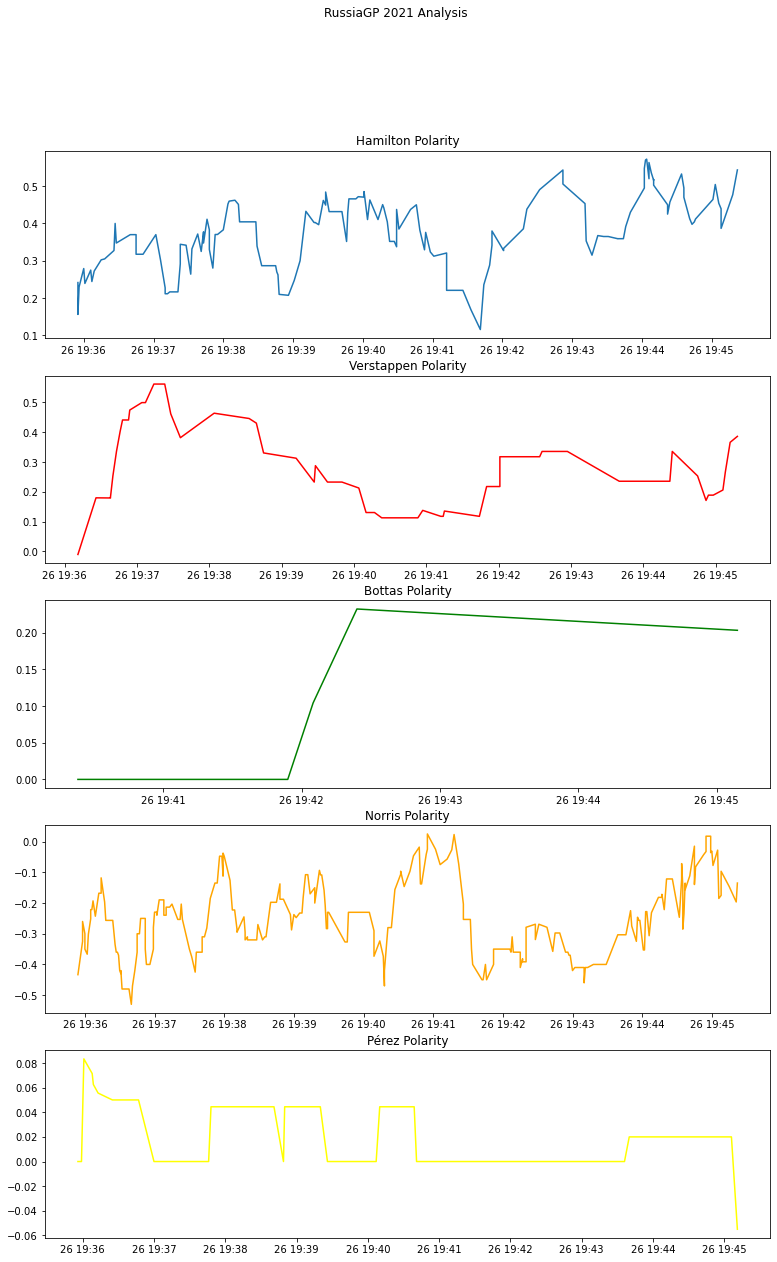

In [64]:
repub = 'red'
demo = 'blue'
fig, axes = plt.subplots(5, 1, figsize=(13, 20))

axes[0].plot(hamilton['Timestamp'], hamilton['MA Polarity'])
axes[0].set_title("\n".join(["Hamilton Polarity"]))
axes[1].plot(verstappen['Timestamp'], verstappen['MA Polarity'], color='red')
axes[1].set_title("\n".join(["Verstappen Polarity"]))
axes[2].plot(bottas['Timestamp'], bottas['MA Polarity'], color='green')
axes[2].set_title("\n".join(["Bottas Polarity"]))
axes[3].plot(norris['Timestamp'], norris['MA Polarity'], color='orange')
axes[3].set_title("\n".join(["Norris Polarity"]))
axes[4].plot(perez['Timestamp'], perez['MA Polarity'], color='yellow')
axes[4].set_title("\n".join(["Pérez Polarity"]))

fig.suptitle("\n".join(["RussiaGP 2021 Analysis"]))

plt.show()